In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages

pipeline:<br>
df = pd.read_csv("Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")<br>
df.columns = df.columns.str.strip()<br>
df['Label'] = df['Label'].apply(lambda x: 0 if x.strip().lower() == 'benign' else 1)<br>
df.replace([np.inf, -np.inf], np.nan, inplace=True)<br>
df.dropna(inplace=True)

df1 = df.drop(['Flow ID', 'Source IP', 'Source Port', 'Destination IP',
       'Destination Port', 'Timestamp', 'Label'], axis=1)<br>
       
label = df["Label"]<br>
df1.drop(['Label'], axis=1, inplace=True)
features = df1.columns<br>
df1.dropna()<br>

In [2]:
df = pd.read_csv("Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")
df

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,192.168.10.5-104.16.207.165-54865-443-6,104.16.207.165,443,192.168.10.5,54865,6,7/7/2017 3:30,3,2,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,192.168.10.5-104.16.28.216-55054-80-6,104.16.28.216,80,192.168.10.5,55054,6,7/7/2017 3:30,109,1,1,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,192.168.10.5-104.16.28.216-55055-80-6,104.16.28.216,80,192.168.10.5,55055,6,7/7/2017 3:30,52,1,1,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,192.168.10.16-104.17.241.25-46236-443-6,104.17.241.25,443,192.168.10.16,46236,6,7/7/2017 3:30,34,1,1,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,192.168.10.5-104.19.196.102-54863-443-6,104.19.196.102,443,192.168.10.5,54863,6,7/7/2017 3:30,3,2,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225740,192.168.10.15-72.21.91.29-61374-80-6,72.21.91.29,80,192.168.10.15,61374,6,7/7/2017 5:02,61,1,1,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225741,192.168.10.15-72.21.91.29-61378-80-6,72.21.91.29,80,192.168.10.15,61378,6,7/7/2017 5:02,72,1,1,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225742,192.168.10.15-72.21.91.29-61375-80-6,72.21.91.29,80,192.168.10.15,61375,6,7/7/2017 5:02,75,1,1,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225743,192.168.10.15-8.41.222.187-61323-80-6,8.41.222.187,80,192.168.10.15,61323,6,7/7/2017 5:02,48,2,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [3]:
df.columns

Index(['Flow ID', ' Source IP', ' Source Port', ' Destination IP',
       ' Destination Port', ' Protocol', ' Timestamp', ' Flow Duration',
       ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Length', ' Max Pa

In [4]:
df.columns = df.columns.str.strip()
df.columns

Index(['Flow ID', 'Source IP', 'Source Port', 'Destination IP',
       'Destination Port', 'Protocol', 'Timestamp', 'Flow Duration',
       'Total Fwd Packets', 'Total Backward Packets',
       'Total Length of Fwd Packets', 'Total Length of Bwd Packets',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
  

In [5]:
df["Label"].value_counts()

Label
DDoS      128027
BENIGN     97718
Name: count, dtype: int64

In [6]:
# Binary label: 1 = Attack, 0 = Benign
df['Label'] = df['Label'].apply(lambda x: 0 if x.strip().lower() == 'benign' else 1)
df[:5]

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,192.168.10.5-104.16.207.165-54865-443-6,104.16.207.165,443,192.168.10.5,54865,6,7/7/2017 3:30,3,2,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
1,192.168.10.5-104.16.28.216-55054-80-6,104.16.28.216,80,192.168.10.5,55054,6,7/7/2017 3:30,109,1,1,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
2,192.168.10.5-104.16.28.216-55055-80-6,104.16.28.216,80,192.168.10.5,55055,6,7/7/2017 3:30,52,1,1,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
3,192.168.10.16-104.17.241.25-46236-443-6,104.17.241.25,443,192.168.10.16,46236,6,7/7/2017 3:30,34,1,1,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
4,192.168.10.5-104.19.196.102-54863-443-6,104.19.196.102,443,192.168.10.5,54863,6,7/7/2017 3:30,3,2,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0


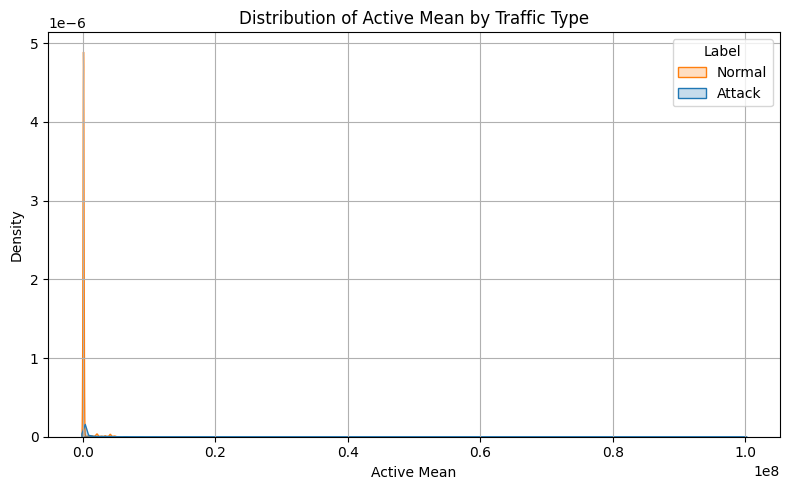

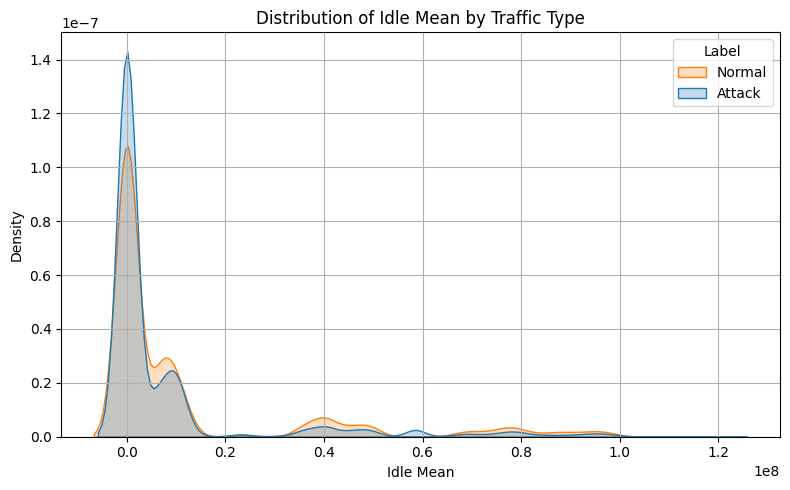

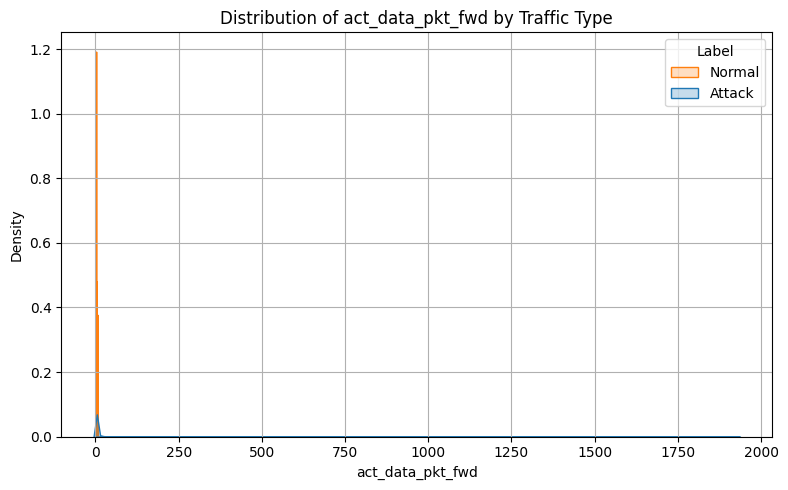

In [12]:
# features_to_plot = ['Active Mean', 'Idle Mean', 'act_data_pkt_fwd']
# for feature in features_to_plot:
#     plt.figure(figsize=(8, 5))
#     sns.kdeplot(data=df, x=feature, hue='Label', common_norm=False, fill=True)
#     plt.title(f"Distribution of {feature} by Traffic Type")
#     plt.xlabel(feature)
#     plt.ylabel("Density")
#     plt.legend(title='Label', labels=['Normal', 'Attack'])
#     plt.grid(True)
#     plt.tight_layout()
#     plt.show()

In [7]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [8]:
df.dropna(inplace=True)

In [9]:
df1 = df.drop(['Flow ID', 'Source IP', 'Source Port', 'Destination IP',
       'Destination Port', 'Timestamp'], axis=1)
df1.head()

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,6,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
1,6,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
2,6,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
3,6,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
4,6,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0


In [10]:
label = df1["Label"]
label

0         0
1         0
2         0
3         0
4         0
         ..
225740    0
225741    0
225742    0
225743    0
225744    0
Name: Label, Length: 225711, dtype: int64

In [11]:
df1.drop(['Label'], axis=1, inplace=True)
features = df1.columns
features

Index(['Protocol', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Count', 'R

In [19]:
# df1.describe

<bound method NDFrame.describe of         Protocol  Flow Duration  Total Fwd Packets  Total Backward Packets  \
0              6              3                  2                       0   
1              6            109                  1                       1   
2              6             52                  1                       1   
3              6             34                  1                       1   
4              6              3                  2                       0   
...          ...            ...                ...                     ...   
225740         6             61                  1                       1   
225741         6             72                  1                       1   
225742         6             75                  1                       1   
225743         6             48                  2                       0   
225744         6             68                  1                       1   

        Total Length of Fwd P

In [25]:
# for i in features:
#     if df1[i].isnull().any():
#         print(f"{i}")

In [26]:
# df["Flow Bytes/s"].isnull().sum()

np.int64(0)

In [13]:
# for col in features:
#     null_rows = df[df[col].isnull()]
#     if not null_rows.empty:
#         print(f"--- {col} ---")
#         print(null_rows['Label'].value_counts())

--- Flow Bytes/s ---
Label
0    4
Name: count, dtype: int64


In [28]:
# df1.describe().T.sort_values(by='max', ascending=False)

,count,mean,std,min,25%,50%,75%,max
Flow Bytes/s,225711.0,5.853939e+05,1.688552e+07,-12000000.0,12.081887,1133.465571,2.158024e+04,2.070000e+09
Bwd IAT Total,225711.0,6.565690e+06,2.198606e+07,0.0,0.000000,41144.000000,1.111977e+06,1.200000e+08
Idle Mean,225711.0,1.032370e+07,2.185431e+07,0.0,0.000000,0.000000,8.241416e+06,1.200000e+08
Idle Max,225711.0,1.288007e+07,2.692283e+07,0.0,0.000000,0.000000,8.254452e+06,1.200000e+08
Bwd IAT Max,225711.0,4.568202e+06,1.617977e+07,0.0,0.000000,33401.000000,1.094341e+06,1.200000e+08
...,...,...,...,...,...,...,...,...
Bwd Avg Packets/Bulk,225711.0,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00
Fwd Avg Packets/Bulk,225711.0,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00
Fwd Avg Bytes/Bulk,225711.0,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00
CWE Flag Count,225711.0,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00


In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [13]:
x_train, x_test, y_train, y_test = train_test_split(df1, label, test_size=0.2, random_state=42)
x_train.head(), x_test.head(), y_train.head(), y_test.head()

(        Protocol  Flow Duration  Total Fwd Packets  Total Backward Packets  \
 77383          6       80288134                  9                       5   
 35125          6       10583720                  5                       0   
 15037          6      116751635                 18                      15   
 119974         6        7074543                  1                       6   
 131153         6        4024921                  5                       0   
 
         Total Length of Fwd Packets  Total Length of Bwd Packets  \
 77383                            62                        11601   
 35125                            30                            0   
 15037                           676                          774   
 119974                            6                           36   
 131153                           30                            0   
 
         Fwd Packet Length Max  Fwd Packet Length Min  Fwd Packet Length Mean  \
 77383                     

In [14]:
y_test.value_counts()

Label
1    25724
0    19419
Name: count, dtype: int64

In [15]:
models = {
    "random_forest" : RandomForestClassifier(n_estimators=100, random_state=42),
    "logistic_regression" : LogisticRegression(max_iter=500),
    "GaussianNB" : GaussianNB()
}


for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f"{name=}")
    print(classification_report(y_test, y_pred))

name='random_forest'
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19419
           1       1.00      1.00      1.00     25724

    accuracy                           1.00     45143
   macro avg       1.00      1.00      1.00     45143
weighted avg       1.00      1.00      1.00     45143



C:\Users\hp\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 500 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=500).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


name='logistic_regression'
              precision    recall  f1-score   support

           0       0.96      0.88      0.92     19419
           1       0.92      0.97      0.94     25724

    accuracy                           0.93     45143
   macro avg       0.94      0.93      0.93     45143
weighted avg       0.94      0.93      0.93     45143

name='GaussianNB'
              precision    recall  f1-score   support

           0       1.00      0.47      0.64     19419
           1       0.71      1.00      0.83     25724

    accuracy                           0.77     45143
   macro avg       0.86      0.73      0.73     45143
weighted avg       0.84      0.77      0.75     45143



In [25]:
df2 = df1.copy()
df2['label'] = label

In [26]:
correlations = df2.corr(numeric_only=True)['label'].abs().sort_values(ascending=False)
print(correlations.head(15))

label                     1.000000
Bwd Packet Length Mean    0.603258
Avg Bwd Segment Size      0.603258
Bwd Packet Length Max     0.577287
Bwd Packet Length Std     0.576122
Protocol                  0.472019
URG Flag Count            0.463294
Packet Length Mean        0.454211
Average Packet Size       0.453399
Packet Length Std         0.443681
Min Packet Length         0.427484
Max Packet Length         0.414329
Packet Length Variance    0.408037
min_seg_size_forward      0.407321
Bwd Packet Length Min     0.366447
Name: label, dtype: float64


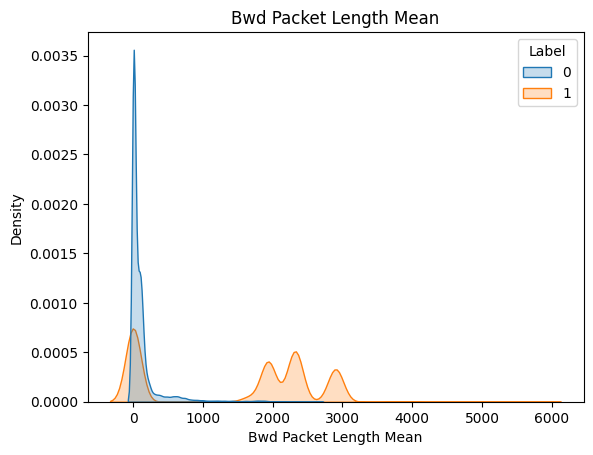

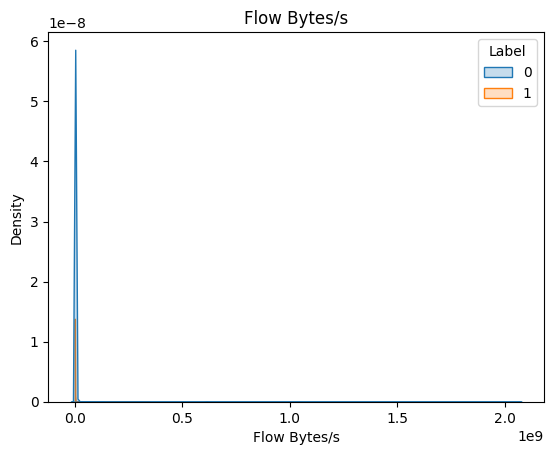

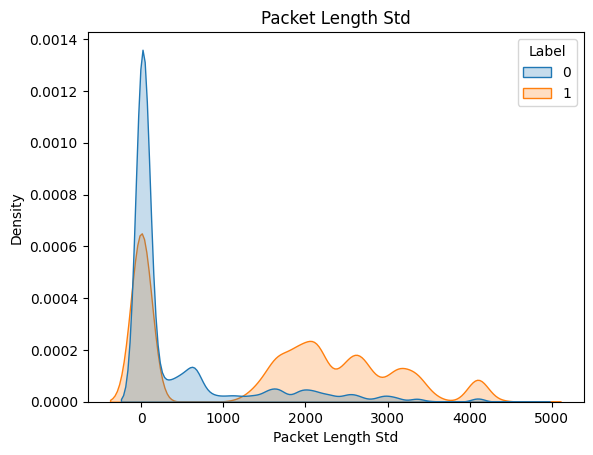

In [27]:
# for col in ['Bwd Packet Length Mean', 'Flow Bytes/s', 'Packet Length Std']:
#     sns.kdeplot(data=df, x=col, hue='Label', fill=True)
#     plt.title(col)
#     plt.show()

In [16]:
pd.set_option('display.max_rows', None)

In [17]:
skewness = df1.skew().sort_values(ascending=False)
print(skewness)

ECE Flag Count                 91.415414
RST Flag Count                 91.415414
act_data_pkt_fwd               79.255493
Active Std                     77.532924
Flow Bytes/s                   73.846792
Total Length of Bwd Packets    69.592297
Subflow Bwd Bytes              69.592297
Subflow Bwd Packets            66.207313
Total Backward Packets         66.207313
Subflow Fwd Packets            59.632993
Total Fwd Packets              59.632993
Bwd Header Length              56.272516
Bwd Packets/s                  56.170910
Flow IAT Min                   55.919064
Fwd Header Length              54.407135
Fwd Header Length.1            54.407135
Fwd IAT Min                    22.686686
Bwd IAT Min                    20.772082
FIN Flag Count                 19.350731
Active Min                     15.442573
Active Mean                    15.184942
Active Max                     15.136224
Bwd IAT Mean                   14.213035
Fwd Packets/s                  13.329705
Flow Packets/s  

In [18]:
models['random_forest'].feature_importances_

array([2.36495782e-03, 4.70461341e-03, 9.52174704e-03, 1.07349894e-02,
       3.89344762e-02, 1.31097649e-02, 7.01169746e-02, 5.77059952e-04,
       6.50378083e-02, 1.74075455e-02, 1.97165773e-02, 5.56233740e-02,
       5.66565624e-03, 1.49681824e-02, 4.13948994e-04, 1.68637409e-03,
       1.41110413e-03, 6.11974874e-03, 1.65127710e-03, 1.63459513e-03,
       2.87780323e-02, 3.11124327e-02, 3.60842830e-02, 3.28768205e-02,
       9.58013773e-03, 1.28992205e-02, 4.30203342e-03, 1.97966004e-03,
       8.61673150e-03, 2.25265440e-04, 2.08453009e-05, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.87327843e-02, 6.95251184e-03,
       1.42224089e-03, 1.68603941e-02, 8.44793013e-04, 1.65389363e-02,
       5.42746668e-03, 4.42266624e-03, 6.62052673e-03, 1.08836760e-04,
       1.02335655e-04, 0.00000000e+00, 2.31168794e-03, 4.17383048e-05,
       1.23201889e-03, 0.00000000e+00, 0.00000000e+00, 8.06205833e-04,
       1.47013170e-02, 1.05399404e-01, 1.31339637e-02, 1.91770477e-02,
      

In [19]:
importances = models['random_forest'].feature_importances_
feature_names = x_train.columns

feat_imp = pd.Series(importances, index=feature_names)
feat_imp = feat_imp.sort_values(ascending=False)
feat_imp

Avg Fwd Segment Size           0.105399
Init_Win_bytes_forward         0.076812
Fwd Packet Length Max          0.070117
Fwd Packet Length Mean         0.065038
Bwd Packet Length Min          0.055623
Subflow Fwd Packets            0.052160
act_data_pkt_fwd               0.044111
Subflow Fwd Bytes              0.043122
Total Length of Fwd Packets    0.038934
Fwd IAT Std                    0.036084
Fwd IAT Max                    0.032877
Fwd IAT Mean                   0.031112
Fwd IAT Total                  0.028778
Fwd Header Length              0.028733
Bwd Packet Length Max          0.019717
Fwd Header Length.1            0.019177
Fwd Packet Length Std          0.017408
Bwd Packets/s                  0.016860
Max Packet Length              0.016539
Bwd Packet Length Std          0.014968
Average Packet Size            0.014701
Avg Bwd Segment Size           0.013134
Total Length of Bwd Packets    0.013110
Bwd IAT Total                  0.012899
Init_Win_bytes_backward        0.011823


In [20]:
# drop top K important features

K = 6
top_k_features = feat_imp.head(K).index.tolist()

x_train_reduced = x_train.drop(columns=top_k_features)
x_test_reduced = x_test.drop(columns=top_k_features)

In [21]:
x_train_reduced.columns

Index(['Protocol', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Min',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count',
       'URG Flag Count', 'CWE Flag Cou

In [22]:
rf_reduced = RandomForestClassifier(n_estimators=100, random_state=102)

In [23]:
rf_reduced.fit(x_train_reduced, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [24]:
y_pred_original = models['random_forest'].predict(x_test)
y_pred_reduced = rf_reduced.predict(x_test_reduced)

print("Original model:")
print(classification_report(y_test, y_pred_original))

print(f"Reduced model (top-{K} features removed):")
print(classification_report(y_test, y_pred_reduced))

Original model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19419
           1       1.00      1.00      1.00     25724

    accuracy                           1.00     45143
   macro avg       1.00      1.00      1.00     45143
weighted avg       1.00      1.00      1.00     45143

Reduced model (top-6 features removed):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19419
           1       1.00      1.00      1.00     25724

    accuracy                           1.00     45143
   macro avg       1.00      1.00      1.00     45143
weighted avg       1.00      1.00      1.00     45143



<h1>💡 Note:</h1>
The model achieves perfect scores due to the clean and strongly separable nature of DDoS vs. normal traffic in this dataset. High performance on test data due to strong feature separability

In [ ]:
rf_importance = rf_reduced.feature_importances_
rf_feat_names = x_train_reduced.columns
rf_feat_imp = pd.Series(rf_importance, index=rf_feat_names)
rf_feat_imp = rf_feat_imp.sort_values(ascending=False)
rf_feat_imp

In [32]:
import joblib

joblib.dump(rf_reduced, 'ddos_reduced_model.pkl')

['ddos_reduced_model.pkl']

In [34]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(models["random_forest"], x_train, y_train, cv=cv, scoring='f1_macro')

print("Stratified CV scores:", scores)
print("Mean F1 (macro):", scores.mean())

Stratified CV scores: [0.99977449 0.9997745  0.99988725 0.99971811 0.99966176 0.99977448
 0.99983086 0.99988724 0.99977448 0.99977447]
Mean F1 (macro): 0.999785763458588


In [36]:
scores = cross_val_score(rf_reduced, x_train_reduced, y_train, cv=cv, scoring='f1_macro')

print("Stratified CV scores:", scores)
print("Mean F1 (macro):", scores.mean())

Stratified CV scores: [0.99977449 0.99966176 0.99977449 0.99971811 0.99949265 0.99977449
 0.9997181  0.99977448 0.99949259 0.99960533]
Mean F1 (macro): 0.9996786472725502
